# Regresyon Analizi

Bir tane sonuç değişkenimiz var. (Bağımsız)

Birde bunu açıklamaya yardımcı bağımlı değişkenler var.

Doğrusal Regresyon : 

y = B0 + B1x1 + €1

B0, B1 = katsayılar

€1 = hata oranı

In [104]:
import numpy as np
import pandas as pd
import seaborn as sns
import pylab
import scipy 

import statsmodels.stats.api as sms

import statsmodels.api as sm
import scipy.stats as stats

import matplotlib.pyplot as plt

from scipy import stats
from matplotlib.pyplot import plot
from scipy.stats import shapiro


from scipy import stats

## Veri okuma inceleme

In [103]:
df = pd.read_excel("hw_data_set.xlsx")
df.head()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_416,ind_418,ind_420,ind_422,ind_424,ind_426,ind_428,20_target,50_target,90_target
0,19,17,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,-49.6,-54,-152,-353,1.0,0.498547,0.701906,15.135802,35.625252,36.997753
1,24,19,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,-55.6,-60,-158,-359,1.0,0.537088,0.690833,15.143348,35.643013,37.016198
2,30,24,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,-58.4,-60,-160,-362,1.0,0.615169,0.693040,15.146870,35.651301,-37.024805
3,37,30,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,-61.8,-65,-166,-367,1.0,0.661517,0.673418,15.153283,0.000000,-37.040483
4,41,37,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,-79.8,-86,-186,-388,1.0,0.747204,0.700522,-15.179065,-35.727079,-37.103503


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6167 entries, 0 to 6166
Columns: 136 entries, ind_5 to 90_target
dtypes: float64(88), int64(45), object(3)
memory usage: 6.4+ MB


In [4]:
df.shape

(6167, 136)

In [5]:
df.describe()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_412,ind_414,ind_416,ind_418,ind_424,ind_426,ind_428,20_target,50_target,90_target
count,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,...,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000
mean,-0.803146,-0.803470,48.388890,48.289282,0.099609,49.488867,-18.497518,11.771485,11.773550,11.773392,...,0.000224,28.529204,-8.554792,-28.166694,0.490297,0.498188,0.490174,-0.057102,-2.906358,-3.315072
std,23.624403,23.624144,36.388526,36.478009,60.414625,12.198722,68.281120,6.803997,5.786089,4.970499,...,0.005660,26.316896,16.100087,23.271524,0.425376,0.228547,0.150483,14.834497,34.559778,36.841541
min,-131.000000,-131.000000,0.000000,0.000000,-100.000000,12.134540,-625.093855,1.050000,1.660000,2.580000,...,-0.023790,0.000000,-103.800000,-188.000000,0.000000,0.000000,0.083530,-15.780588,-37.142889,-38.573858
25%,-14.000000,-14.000000,14.285714,14.285714,-50.000000,40.868503,-45.687212,6.850000,7.260000,7.635000,...,-0.003230,10.700000,-11.700000,-39.000000,0.000000,0.323783,0.379894,-15.350354,-36.208094,-37.695273
50%,0.000000,0.000000,50.000000,50.000000,0.000000,49.549766,-2.817298,10.550000,11.040000,11.270000,...,-0.000053,21.300000,0.000000,-22.000000,0.473684,0.495192,0.487078,0.000000,-34.267756,-35.788391
75%,13.000000,13.000000,85.714286,85.714286,57.142857,58.504375,28.072613,14.950000,15.040000,14.960000,...,0.003414,38.400000,0.000000,-11.000000,1.000000,0.675730,0.601508,15.385945,35.879524,37.521892
max,76.000000,76.000000,100.000000,100.000000,100.000000,84.821848,81.105847,82.900000,54.240000,37.050000,...,0.023340,281.800000,0.000000,0.000000,1.000000,1.000000,0.868534,15.768767,37.038694,38.465649


In [94]:
# nul değer olup olmadıgına bakma
df.isnull().values.any()

False

In [7]:
df.dtypes

ind_5          int64
ind_6          int64
ind_8        float64
ind_9        float64
ind_10       float64
              ...   
ind_426      float64
ind_428      float64
20_target    float64
50_target    float64
90_target    float64
Length: 136, dtype: object

## Verideki kategorik değişkenlere bakma

In [100]:
df=df.select_dtypes(include=["object"])
df.head()

,ind_109,ind_420,ind_422
0,GREEN,-152,-353
1,GREEN,-158,-359
2,GREEN,-160,-362
3,GREEN,-166,-367
4,GREEN,-186,-388


In [99]:
df.groupby("ind_420").count().tail(1)
df.groupby("ind_422").count().tail(1)

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_414,ind_416,ind_418,ind_420,ind_424,ind_426,ind_428,20_target,50_target,90_target
ind_422,,,,,,,,,,,,,,,,,,,,,
?,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,...,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041


### Korelasyona bakma

In [8]:
df.corr()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_412,ind_414,ind_416,ind_418,ind_424,ind_426,ind_428,20_target,50_target,90_target
ind_5,1.000000,0.989945,0.543246,-0.533328,0.649225,0.822255,0.768234,-0.014502,-0.026336,-0.041130,...,0.620106,-0.694619,-0.304134,-0.620099,0.076169,0.626439,0.817302,0.060969,0.068989,0.060428
ind_6,0.989945,1.000000,0.514222,-0.495572,0.608947,0.768551,0.713870,-0.006066,-0.019393,-0.035795,...,0.634679,-0.646983,-0.279922,-0.569657,0.021220,0.567359,0.810371,0.062101,0.069652,0.061560
ind_8,0.543246,0.514222,1.000000,-0.374857,0.828650,0.583623,0.482220,0.162635,0.139612,0.038862,...,0.275687,-0.489596,-0.277258,-0.432579,0.144795,0.593799,0.445427,-0.004126,0.006984,-0.006650
ind_9,-0.533328,-0.495572,-0.374857,1.000000,-0.829576,-0.609288,-0.568581,0.238938,0.240048,0.152133,...,-0.276882,0.436275,0.349318,0.505772,-0.173139,-0.631961,-0.450719,-0.031316,-0.004053,0.012093
ind_10,0.649225,0.608947,0.828650,-0.829576,1.000000,0.719409,0.633753,-0.046312,-0.060849,-0.068450,...,0.333229,-0.558311,-0.377913,-0.565931,0.191752,0.739227,0.540428,0.016423,0.006654,-0.011307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ind_426,0.626439,0.567359,0.593799,-0.631961,0.739227,0.776076,0.700736,-0.066201,-0.066437,-0.051049,...,0.293592,-0.571432,-0.356302,-0.594243,0.341017,1.000000,0.584754,0.019599,0.009063,-0.002519
ind_428,0.817302,0.810371,0.445427,-0.450719,0.540428,0.807595,0.727899,0.021970,0.016318,0.010361,...,0.574646,-0.499656,-0.260048,-0.487564,0.188853,0.584754,1.000000,0.047041,0.052418,0.043563
20_target,0.060969,0.062101,-0.004126,-0.031316,0.016423,0.042550,0.041289,0.015320,0.012012,0.026881,...,0.066637,-0.029005,-0.009829,-0.045656,-0.008799,0.019599,0.047041,1.000000,0.384076,0.355950
50_target,0.068989,0.069652,0.006984,-0.004053,0.006654,0.055045,0.048302,0.072728,0.084561,0.101774,...,0.127234,0.008239,0.047728,-0.101488,-0.003372,0.009063,0.052418,0.384076,1.000000,0.940916


In [9]:
df.corr()['20_target'].sort_values(ascending = False)

20_target    1.000000
50_target    0.384076
90_target    0.355950
ind_37       0.089695
ind_332      0.089679
               ...   
ind_51      -0.070911
ind_334     -0.071096
ind_50      -0.071823
ind_70      -0.072131
ind_130     -0.079174
Name: 20_target, Length: 133, dtype: float64

In [10]:
df.corr()['50_target'].sort_values(ascending = False)

50_target    1.000000
90_target    0.940916
20_target    0.384076
ind_412      0.127234
ind_18       0.127057
               ...   
ind_67      -0.069859
ind_330     -0.075589
ind_26      -0.084275
ind_418     -0.101488
ind_324     -0.110802
Name: 50_target, Length: 133, dtype: float64

In [11]:
df.corr()['90_target'].sort_values(ascending = False)

90_target    1.000000
50_target    0.940916
20_target    0.355950
ind_18       0.140877
ind_17       0.129277
               ...   
ind_128     -0.061283
ind_26      -0.086192
ind_330     -0.093811
ind_418     -0.096903
ind_324     -0.103707
Name: 90_target, Length: 133, dtype: float64

3 target değişkenin korelasyon sıralamasına bakarak en büyük değere sahip taget_50 olduğu gözlemlenmiştir.

In [12]:
# bu nedenle 20 ve 90 kaldırıldı

columns = ['20_target', '90_target']
df.drop(columns, inplace=True, axis=1)

In [13]:
# If correlation is greater than 0.90 show the column
corr = df.corr() 

m = ~(corr.mask(np.eye(len(corr), dtype=bool)).abs() > 0.90).any()
raw = corr.loc[m, m]
raw

,ind_8,ind_9,ind_10,ind_14,ind_15,ind_18,ind_25,ind_26,ind_27,ind_28,...,ind_344,ind_352,ind_397,ind_399,ind_412,ind_416,ind_424,ind_426,ind_428,50_target
ind_8,1.000000,-0.374857,0.828650,0.162635,0.139612,-0.012341,-0.054387,-0.114022,-0.186725,0.076141,...,-0.033844,0.012419,-0.118371,0.481655,0.275687,-0.277258,0.144795,0.593799,0.445427,0.006984
ind_9,-0.374857,1.000000,-0.829576,0.238938,0.240048,-0.127658,0.191755,-0.036398,0.180808,-0.100826,...,0.082468,-0.042354,0.102421,-0.482790,-0.276882,0.349318,-0.173139,-0.631961,-0.450719,-0.004053
ind_10,0.828650,-0.829576,1.000000,-0.046312,-0.060849,0.069646,-0.148539,-0.046700,-0.221638,0.106739,...,-0.070178,0.033053,-0.133138,0.581613,0.333229,-0.377913,0.191752,0.739227,0.540428,0.006654
ind_14,0.162635,0.238938,-0.046312,1.000000,0.839642,0.238631,0.523360,-0.485883,0.072443,-0.012543,...,-0.041509,-0.008664,-0.026387,-0.065571,-0.001524,0.037185,-0.011056,-0.066201,0.021970,0.072728
ind_15,0.139612,0.240048,-0.060849,0.839642,1.000000,0.321320,0.650224,-0.620696,0.071449,-0.012267,...,-0.041526,-0.005343,0.007027,-0.077879,-0.011403,0.036179,-0.010548,-0.066437,0.016318,0.084561
ind_18,-0.012341,-0.127658,0.069646,0.238631,0.321320,1.000000,0.350490,-0.361721,0.008946,0.030568,...,-0.058657,0.034298,0.010351,0.051626,-0.018460,-0.144709,0.033683,0.097413,0.089473,0.127057
ind_25,-0.054387,0.191755,-0.148539,0.523360,0.650224,0.350490,1.000000,-0.602196,0.493740,-0.027858,...,-0.040793,0.007308,0.050872,-0.315469,-0.057298,0.056578,-0.028571,-0.182310,-0.022500,0.059280
ind_26,-0.114022,-0.036398,-0.046700,-0.485883,-0.620696,-0.361721,-0.602196,1.000000,0.396923,0.005659,...,0.048495,-0.024326,-0.028367,-0.139486,0.024041,0.048521,0.007909,-0.084374,0.050332,-0.084275
ind_27,-0.186725,0.180808,-0.221638,0.072443,0.071449,0.008946,0.493740,0.396923,1.000000,-0.025866,...,0.005918,-0.018089,0.027587,-0.514626,-0.039687,0.117902,-0.024231,-0.301499,0.028963,-0.023645
ind_28,0.076141,-0.100826,0.106739,-0.012543,-0.012267,0.030568,-0.027858,0.005659,-0.025866,1.000000,...,0.011397,0.012178,-0.446485,-0.095818,0.004400,-0.102179,0.569942,0.197572,0.102867,-0.002270


In [14]:
column_list=[]
for i in raw:
    if i!='50_target':
        column_list.append(i)

In [15]:
df.drop(column_list, inplace=True, axis=1)

In [16]:
df.shape

(6167, 85)

### 50_target ve corelasyonu  0.90'dan küçük olanlar kaldı

In [17]:
df.info

<bound method DataFrame.info of       ind_5  ind_6     ind_12     ind_13  ind_16     ind_17  ind_19  ind_20  \
0        19     17  72.363515  60.808814   11.73  12.060000       2      15   
1        24     19  74.275883  64.366798   12.22  11.326667       0      11   
2        30     24  75.140402  65.915803   12.28  10.973333       5      15   
3        37     30  76.677846  68.584234   12.61  10.426667      11      18   
4        41     37  81.603007  76.455495   14.25  11.406667      13      23   
...     ...    ...        ...        ...     ...        ...     ...     ...   
6162     27     31  60.010531  32.362582   13.66  15.100000      13      31   
6163     22     27  60.209998  32.914628   11.79  14.753333      11      30   
6164     19     22  64.329611  43.550592   10.30  14.613333      11      29   
6165     19     19  69.027764  54.130755   10.55  13.606667       9      27   
6166     19     19  65.157180  45.524973    9.68  13.020000       6      23   

      ind_21  ind_2

kategorik columnlara ve değer sayılarına bakma

In [19]:
df.groupby("ind_109").count()

,ind_5,ind_6,ind_12,ind_13,ind_16,ind_17,ind_19,ind_20,ind_21,ind_22,...,ind_403,ind_404,ind_406,ind_407,ind_410,ind_414,ind_418,ind_420,ind_422,50_target
ind_109,,,,,,,,,,,,,,,,,,,,,
GREEN,3132,3132,3132,3132,3132,3132,3132,3132,3132,3132,...,3132,3132,3132,3132,3132,3132,3132,3132,3132,3132
RED,3035,3035,3035,3035,3035,3035,3035,3035,3035,3035,...,3035,3035,3035,3035,3035,3035,3035,3035,3035,3035


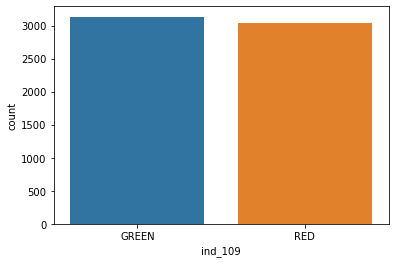

In [20]:
sns.countplot("ind_109", data=df)

In [26]:
import statsmodels.stats.api as sms
from scipy.stats import levene
from scipy.stats import shapiro
from scipy import stats

# İstatistik

In [117]:
for col in df.columns[:]:           
    if df[col].dtypes != object:
        
        stat, p = shapiro(df[col])
        alpha = 0.05
        if p > alpha:
            print(col)
            print('Örneklem Normal dağılımdan gelmektedir')

##### Tüm veriler normal dağılımdan gelmemektedir. 

In [35]:
stats, p = shapiro(df["50_target"])
print('Statistics-%.3f, p=%.3f' % (stats,p))

Statistics-0.692, p=0.000


p value < 0.05 

reject H0

Normal dağılımdan gelmiyor.

In [37]:
stats, p = shapiro(df["ind_6"])
print('Statistics-%.3f, p=%.3f' % (stats,p))

Statistics-0.978, p=0.000


p value < 0.05

reject H0

Normal dağılımdan gelmiyor.

## Data Visualization

##### Targets

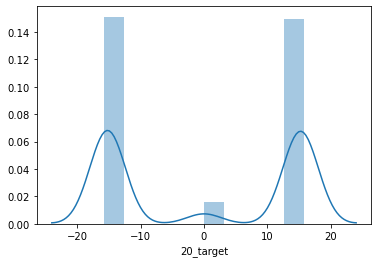

In [106]:
sns.distplot(df["20_target"])
plt.show()

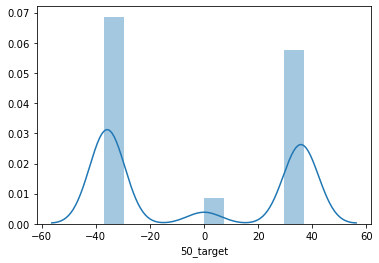

In [107]:
sns.distplot(df["50_target"])
plt.show()

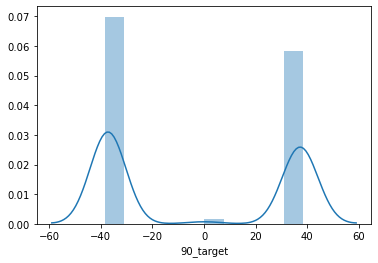

In [108]:
sns.distplot(df["90_target"])
plt.show()

##### QQ Plot

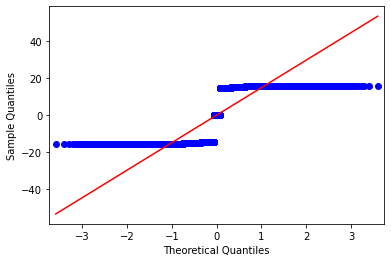

In [109]:
import statsmodels.api as sm
sm.qqplot (df["20_target"], line= "s") 
pylab.show()

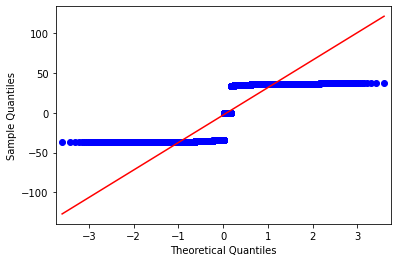

In [45]:
import statsmodels.api as sm
sm.qqplot (df["50_target"], line= "s") 
pylab.show()

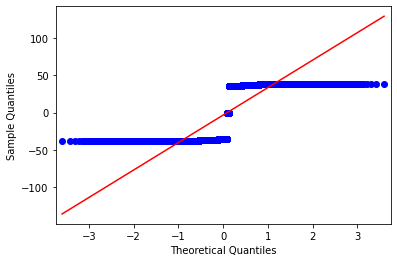

In [110]:
import statsmodels.api as sm
sm.qqplot (df["90_target"], line= "s") 
pylab.show()

##  Regression

In [118]:
df.head(2)

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_416,ind_418,ind_420,ind_422,ind_424,ind_426,ind_428,20_target,50_target,90_target
0,19,17,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,-49.6,-54,-152,-353,1.0,0.498547,0.701906,15.135802,35.625252,36.997753
1,24,19,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,-55.6,-60,-158,-359,1.0,0.537088,0.690833,15.143348,35.643013,37.016198


df["50_target"] = df["50_target"].replace("?", df["50_target"].mean)

df["ind_10"] = df["ind_10"].replace("?", df["ind_10"].mean)

In [125]:
import statsmodels.api as sm
X = df[["ind_10"]]
X[0:5]
X=sm.add_constant(X) # sabit bir değer atıyor , b0 olarak
X[0:5]

y = df["50_target"]
y[0:5]

0    35.625252
1    35.643013
2    35.651301
3     0.000000
4   -35.727079
Name: 50_target, dtype: float64

In [126]:
df["50_target"]

0       35.625252
1       35.643013
2       35.651301
3        0.000000
4      -35.727079
          ...    
6162   -34.536532
6163   -34.537716
6164   -34.563173
6165   -34.597806
6166   -34.583301
Name: 50_target, Length: 6167, dtype: float64

In [127]:
lm = sm.OLS(y.astype(float),X.astype(float))
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              50_target   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.2729
Date:                Fri, 24 Jul 2020   Prob (F-statistic):              0.601
Time:                        23:19:43   Log-Likelihood:                -30598.
No. Observations:                6167   AIC:                         6.120e+04
Df Residuals:                    6165   BIC:                         6.121e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.9067      0.440     -6.605      0.000      -3.770      -2.044
ind_10         0.0038      0.007      0.522      0.601      -0.010       0.018
==============================================================================
Omnibus:                    22671.352   Durbin-Watson:                   0.298
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              958.276
Skew:                           0.161   Prob(JB):                    8.18e-209
Kurtosis:                       1.096   Cond. No.                         60.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#####  train test split

In [150]:
from sklearn.model_selection import train_test_split , cross_val_score, cross_val_predict

X = df.drop(labels="90_target",axis=1)
y = df["90_target"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .2, random_state = 42)

In [ ]:
lm = sm.OLS(y_train,X_train)
model = lm.fit()
model.summary()

### Linear Reg

In [149]:
from sklearn.linear_model import LinearRegression


reg = LinearRegression()
model = reg.fit(X,y)

In [151]:
X_train.shape

(4933, 135)

In [152]:
X_test.shape

(1234, 135)

In [153]:
y_train.shape

(4933,)

In [154]:
training = df.copy()
training.shape

(6167, 136)

In [ ]:
lm = sm.OLS(y_train , X_train)
model = lm.fit()

In [156]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              50_target   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.2729
Date:                Sat, 25 Jul 2020   Prob (F-statistic):              0.601
Time:                        00:15:31   Log-Likelihood:                -30598.
No. Observations:                6167   AIC:                         6.120e+04
Df Residuals:                    6165   BIC:                         6.121e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.9067      0.440     -6.605      0.000      -3.770      -2.044
ind_10         0.0038      0.007      0.522      0.601      -0.010       0.018
==============================================================================
Omnibus:                    22671.352   Durbin-Watson:                   0.298
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              958.276
Skew:                           0.161   Prob(JB):                    8.18e-209
Kurtosis:                       1.096   Cond. No.                         60.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### # nasıl bir error dağılımı var hesaplamamız lazım

In [157]:
influence = model.get_influence()
influence

In [158]:
resid_student = influence.resid_studentized_external

import statsmodels.formula.api as smf

lm = smf.ols("ind_10 ~ 50_target",df)

In [138]:
model =lm.fit()

In [139]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              50_target   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.2729
Date:                Sat, 25 Jul 2020   Prob (F-statistic):              0.601
Time:                        00:04:13   Log-Likelihood:                -30598.
No. Observations:                6167   AIC:                         6.120e+04
Df Residuals:                    6165   BIC:                         6.121e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.9067      0.440     -6.605      0.000      -3.770      -2.044
ind_10         0.0038      0.007      0.522      0.601      -0.010       0.018
==============================================================================
Omnibus:                    22671.352   Durbin-Watson:                   0.298
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              958.276
Skew:                           0.161   Prob(JB):                    8.18e-209
Kurtosis:                       1.096   Cond. No.                         60.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [90]:
fig, ax = plt.subplots(figsize=(25,20)

SyntaxError: unexpected EOF while parsing (<ipython-input-90-bc7f7363ea5b>, line 1)

In [ ]:
df.groupby("ind_420").count()

In [ ]:
df['ind_420'] = [ 'A' if i==1 else 'B' for i in df['ind_420']]

In [ ]:
df.groupby("ind_420").count()

sns.pairplot(df['ind_5'],df['ind_6'],df['ind_12'],df['ind_13'], kind="reg") #fit linear regression models to the scatter plots:
sns.pairplot(df['ind_5'],df['ind_6'],df['ind_12'],df['ind_13'], kind="scatter")

sns.jointplot(x="50_target", y="ind_12", data=df, kind="reg")

In [ ]:
# remove this column

removeColumn = ['ind_18',]

In [ ]:
df = df.drop(df[raw], axis=1)


In [ ]:
df.head()

### Correlation

In [ ]:
# If correlation is greater than 0.75 remove the column


m = ~(corr.mask(np.eye(len(corr), dtype=bool)).abs() > 0.75).any()
raw = corr.loc[m, m]
raw

In [ ]:
corr = data.corr()

In [ ]:
sns.heatmap(corr)

In [ ]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.80:
            if columns[j]:
                columns[j] = False
selected_columns = df.columns[columns]
df = df[selected_columns]